<a href="https://colab.research.google.com/github/Jay-Damodaran/PersonalProjects/blob/main/Projects/ImageClassificationApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow as imshow
import ipywidgets as widgets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as report
import random

In [ ]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# import cv2
# img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)

This is an intel image classification dataset
https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [ ]:
!unzip /content/drive/MyDrive/seg_train.zip

# Preprocessing

In [ ]:
DIR = r'/content/seg_train' # raw string with directory path

# function to get shape of data (# images, image_width, image_height, channels)
def data_shape(directory):
    global class_list
    class_list = os.listdir(DIR)
    global class_paths
    # get paths by joining class name to directory name
    class_paths = [os.path.join(DIR, class_name) for class_name in class_list]
    count = 0
    # count total number of images across all classes
    for path in class_paths:
        count += len(os.listdir(path))
    # choose random class and read random image from class folder
    f = random.choice(class_paths)
    img = cv.imread(os.path.join(f, random.choice(os.listdir(f))))
    # get image width, height, and number of color channels
    width, height, channels = img.shape
    return count, width, height, channels

count, width, height, channels = data_shape(DIR) # (14034, 150, 150, 3)

In [ ]:
os.listdir(DIR) # list of classes in dataset

['mountain', 'street', 'glacier', 'forest', 'buildings', 'sea']

In [ ]:
# function to create training and testing data from image folders
def create_train(test_prop = 0.2):
    # create arrays with zeros to hold image and label data
    x = np.zeros((count, width, height, channels), dtype = 'uint8')
    y = np.zeros(count, dtype = 'uint8')

    ind = 0
    # iterate through each class folder
    for label, path in enumerate(class_paths):
        # add each image in class folder to x array and add label to y array
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv.imread(img_path)
            # standardizes image sizes
            if image.shape[0] != width or image.shape[1] != height:
                image = cv.resize(image, (width, height))
            x[ind] = image
            y[ind] = label
            ind += 1
    # limits data to 6000 images due to RAM constraints
    # May try using a dataloader in future projects
    if count > 6000:
        prop = 6000 / count
        x, x_t, y, y_t = tts(x, y, test_size = 1 - prop)
    # splits data into training and testing set
    x_train, x_test, y_train, y_test = tts(x, y, test_size = test_prop)
    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = create_train()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4800, 150, 150, 3)
(1200, 150, 150, 3)


In [ ]:
y_train[:5]

array([5, 3, 3, 0, 1], dtype=uint8)

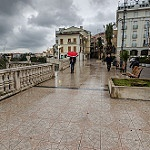

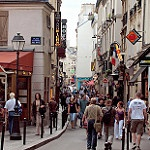

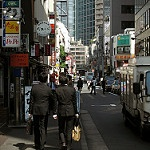

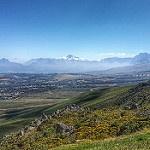

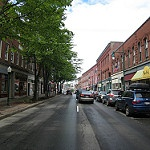

In [ ]:
for im in x_train[:5]:
    imshow(im)

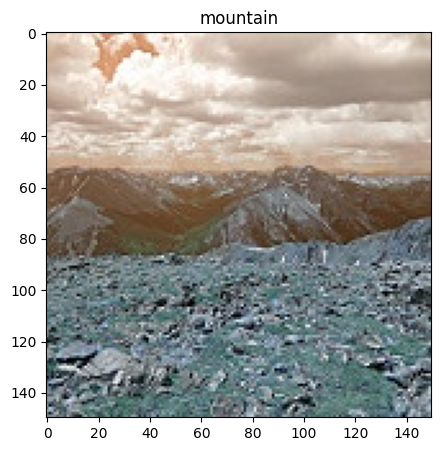

In [ ]:
# function to plot any given image from list
def plot_image(x, y, ind):
    plt.figure(figsize = (5, 5))
    plt.imshow(x[ind])
    plt.title(f'{class_list[y[ind]]}')

plot_image(x_train, y_train, 6)

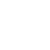

In [ ]:
# generate white image with three color channels
blank = cv.bitwise_not(np.zeros((50, 50, 3), dtype = 'uint8'))
imshow(blank)

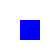

In [ ]:
blank[20:40, 20:40] = [255, 0, 0] # fill selected pixels with any color
imshow(blank)

In [ ]:
#255 is max value so it can be used to normalize data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[:5]

array([[[[0.48235294, 0.63137255, 0.84313725],
         [0.47843137, 0.62745098, 0.83921569],
         [0.47843137, 0.62745098, 0.83921569],
         ...,
         [0.4745098 , 0.62352941, 0.83529412],
         [0.47058824, 0.61960784, 0.83137255],
         [0.46666667, 0.61568627, 0.82745098]],

        [[0.4627451 , 0.61176471, 0.82352941],
         [0.46666667, 0.61568627, 0.82745098],
         [0.4745098 , 0.62352941, 0.83529412],
         ...,
         [0.4745098 , 0.62352941, 0.83529412],
         [0.4745098 , 0.62352941, 0.83529412],
         [0.4745098 , 0.62352941, 0.83529412]],

        [[0.45098039, 0.6       , 0.81176471],
         [0.45882353, 0.60784314, 0.81960784],
         [0.47058824, 0.61960784, 0.83137255],
         ...,
         [0.4745098 , 0.62352941, 0.83529412],
         [0.4745098 , 0.62352941, 0.83529412],
         [0.4745098 , 0.62352941, 0.83529412]],

        ...,

        [[0.32156863, 0.47058824, 0.68235294],
         [0.34509804, 0.49411765, 0.70588235]

# Models

In [ ]:
# Using ANN
ann = models.Sequential([
    layers.Flatten(input_shape = (width, height, channels)),
    layers.Dense(2500, activation = 'relu'),
    layers.Dense(1500, activation = 'sigmoid'),
    layers.Dense(6, activation = 'softmax')
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 8)

Epoch 1/8
150/150 [==============================] - 200s 1s/step - loss: 1.5765 - accuracy: 0.3681
Epoch 2/8
150/150 [==============================] - 196s 1s/step - loss: 1.3510 - accuracy: 0.4737
Epoch 3/8
150/150 [==============================] - 195s 1s/step - loss: 1.3010 - accuracy: 0.4956
Epoch 4/8
150/150 [==============================] - 197s 1s/step - loss: 1.2320 - accuracy: 0.5175
Epoch 5/8
150/150 [==============================] - 193s 1s/step - loss: 1.2003 - accuracy: 0.5346
Epoch 6/8
150/150 [==============================] - 191s 1s/step - loss: 1.1623 - accuracy: 0.5485
Epoch 7/8
150/150 [==============================] - 197s 1s/step - loss: 1.1220 - accuracy: 0.5715
Epoch 8/8
150/150 [==============================] - 191s 1s/step - loss: 1.0858 - accuracy: 0.5869


In [ ]:
ann.evaluate(x_test, y_test)

38/38 [==============================] - 14s 363ms/step - loss: 1.1270 - accuracy: 0.5575


[1.1269768476486206, 0.5575000047683716]

In [ ]:
y_pred = ann.predict(x_test)
pred_classes = [np.argmax(pred) for pred in y_pred]
print(f'\t\tClassification Report\n{report(y_test, pred_classes)}')

38/38 [==============================] - 14s 358ms/step
		Classification Report
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       194
           1       0.53      0.36      0.42       214
           2       0.47      0.64      0.54       188
           3       0.41      0.51      0.46       210
           4       0.61      0.48      0.54       191
           5       0.88      0.66      0.75       203

    accuracy                           0.56      1200
   macro avg       0.58      0.56      0.56      1200
weighted avg       0.58      0.56      0.56      1200



In [ ]:
#Using CNN
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size = (3, 3), activation = 'relu', input_shape = (width, height, channels)),
    layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    layers.Conv2D(filters=64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),

    #dense
    layers.Flatten(),
    layers.Dense(1200, activation = 'sigmoid'),
    layers.Dense(6, activation = 'softmax')
])

cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs = 8)

Epoch 1/8
150/150 [==============================] - 8s 44ms/step - loss: 1.3781 - accuracy: 0.5519
Epoch 2/8
150/150 [==============================] - 7s 45ms/step - loss: 0.7424 - accuracy: 0.7198
Epoch 3/8
150/150 [==============================] - 7s 44ms/step - loss: 0.4925 - accuracy: 0.8196
Epoch 4/8
150/150 [==============================] - 7s 45ms/step - loss: 0.3063 - accuracy: 0.8969
Epoch 5/8
150/150 [==============================] - 7s 44ms/step - loss: 0.1478 - accuracy: 0.9542
Epoch 6/8
150/150 [==============================] - 7s 45ms/step - loss: 0.0795 - accuracy: 0.9767
Epoch 7/8
150/150 [==============================] - 7s 44ms/step - loss: 0.0443 - accuracy: 0.9902
Epoch 8/8
150/150 [==============================] - 7s 45ms/step - loss: 0.0378 - accuracy: 0.9887


In [ ]:
cnn.evaluate(x_test, y_test)

38/38 [==============================] - 1s 18ms/step - loss: 1.2272 - accuracy: 0.7167


[1.2271645069122314, 0.7166666388511658]

In [ ]:
cnn_pred = cnn.predict(x_test)
y_classes = [np.argmax(elem) for elem in cnn_pred]
print(f'\t\tClassification Report\n{report(y_test, y_classes)}')

38/38 [==============================] - 1s 17ms/step
		Classification Report
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       219
           1       0.74      0.75      0.75       210
           2       0.73      0.61      0.66       215
           3       0.94      0.88      0.91       188
           4       0.70      0.71      0.70       182
           5       0.56      0.65      0.60       186

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



# Image Classification App

## Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow as imshow
import ipywidgets as widgets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as report
import random
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
!unzip /content/drive/MyDrive/seg_train.zip

##Widgets to read file

In [ ]:
path = widgets.Textarea(
    description='file path', value = r''
)
read = widgets.Button(description = 'read file')
file_info = widgets.HTML(value = "")

# almost identical to data_shape function earlier except all variables
# previously returned are made global instead
def data_shape(directory):
    global class_list
    class_list = os.listdir(path.value)
    global class_paths
    class_paths = [os.path.join(path.value, class_name) for class_name in class_list]
    global count
    count = 0
    for p in class_paths:
        count += len(os.listdir(p))
    f = random.choice(class_paths)
    img = cv.imread(os.path.join(f, random.choice(os.listdir(f))))
    global width, height, channels
    width, height, channels = img.shape

    # only other modification to data_shape function
    # characteristics are stored as formatted string and stored in HTML widget
    info = "images: {n}<br>image width: {w}<br>image height: {h}<br>color channels {c}".format(n = count, w = width, h = height, c = channels)
    file_info.value = info

# read file when button is clicked and execute data_shape function
upload_hbox = widgets.HBox(children = [path, read])
read.on_click(data_shape)
upload_vbox = widgets.VBox(children = [upload_hbox, file_info])
upload_vbox

## Widgets to display any image in data

In [ ]:
# Scratch code for next cell
# Displays paths of first six files in first class and uses zip() function
a = [(class_name, p) for class_name, p in zip(class_list, class_paths)]
b = os.listdir(a[0][1])[:6]
c = [os.path.join(a[0][1], option) for option in b]
c

['/content/seg_train/sea/4441.jpg',
 '/content/seg_train/sea/1543.jpg',
 '/content/seg_train/sea/912.jpg',
 '/content/seg_train/sea/7245.jpg',
 '/content/seg_train/sea/5145.jpg',
 '/content/seg_train/sea/17784.jpg']

In [ ]:
# Scratch work for next cell
# dropdown to select image class/category
# options are the classes in the dataset and the value is the corresponding path
feature = widgets.Dropdown(options = [(class_name, p) for class_name, p in zip(class_list, class_paths)], value = class_paths[0], description = 'Select feature:')

# prints first six images in chosen class path
# In next cell, all images will be stored in a new dropdown
def feat_change(c):
    # list of first six images in selected image category
    s = os.listdir(feature.value)[:6]
    # list of file paths of those six images
    vals = [os.path.join(feature.value, i) for i in s]
    # construct tuples for each image consisting of (image file, file path)
    options = [(o, v) for o, v in zip(s, vals)]
    # print the list of tuples
    print(options)

feature.observe(feat_change, names = 'value')
feature

Dropdown(description='Select feature:', options=(('mountain', '/content/seg_train/mountain'), ('street', '/con…

[('10690.jpg', '/content/seg_train/glacier/10690.jpg'), ('15159.jpg', '/content/seg_train/glacier/15159.jpg'), ('16174.jpg', '/content/seg_train/glacier/16174.jpg'), ('17194.jpg', '/content/seg_train/glacier/17194.jpg'), ('12723.jpg', '/content/seg_train/glacier/12723.jpg'), ('7749.jpg', '/content/seg_train/glacier/7749.jpg')]
[('11590.jpg', '/content/seg_train/forest/11590.jpg'), ('5002.jpg', '/content/seg_train/forest/5002.jpg'), ('9125.jpg', '/content/seg_train/forest/9125.jpg'), ('722.jpg', '/content/seg_train/forest/722.jpg'), ('15264.jpg', '/content/seg_train/forest/15264.jpg'), ('19299.jpg', '/content/seg_train/forest/19299.jpg')]
[('17229.jpg', '/content/seg_train/street/17229.jpg'), ('3202.jpg', '/content/seg_train/street/3202.jpg'), ('898.jpg', '/content/seg_train/street/898.jpg'), ('6454.jpg', '/content/seg_train/street/6454.jpg'), ('17652.jpg', '/content/seg_train/street/17652.jpg'), ('6848.jpg', '/content/seg_train/street/6848.jpg')]
[('8252.jpg', '/content/seg_train/mount

In [ ]:
# dropdown to select image class/category
# options are the classes in the dataset and the value is the corresponding path
feature = widgets.Dropdown(options = [(class_name, p) for class_name, p in zip(class_list, class_paths)], value = class_paths[0], description = 'Feature:')
# list of images in image class
options = os.listdir(feature.value)
# paths of all images in given image class
vals = [os.path.join(feature.value, o) for o in options]
# new dropdown with options being all images in image class and values being the paths of the images
im = widgets.Dropdown(options = [(o, v) for o, v in zip(options, vals)], value = vals[0], description = 'Image:')
plot_button = widgets.Button(description = 'Plot image')
plot_output = widgets.Output()

# changes list of images when different image category is selected
def on_feature_change(change):
    options = os.listdir(feature.value)
    vals = [os.path.join(feature.value, option) for option in options]
    # construct tuples for each image consisting of (image file, file path)
    im.options = [(o, v) for o, v in zip(options, vals)]
    # default dropdown value is path of first image in class
    im.value = vals[0]

# plots selected image with output widget
def pl(i):
    img = cv.imread(im.value)
    with plot_output:
        plot_output.clear_output()
        imshow(img)

# updates list of images when different feature is selected
feature.observe(on_feature_change, names = 'value')
# displays selected image when plot button is clicked
plot_button.on_click(pl)

plotting_hbox = widgets.HBox(children = [feature, im, plot_button])
plotting_vbox = widgets.VBox(children = [plotting_hbox, plot_output])

In [ ]:
plotting_vbox

## Widgets to convert data to feature, label arrays

In [ ]:
prepare_images = widgets.Button(description = 'prepare images')
preparation_finished = widgets.HTML(value = "")

# modifications: declaring x, y arrays global and no partitioning into training and testing sets
# otherwise identical to create_train defined in preprocessing section
def create_train(c):
    global x, y
    x = np.zeros((count, width, height, channels), dtype = 'uint8')
    y = np.zeros(count, dtype = 'uint8')

    ind = 0
    for label, path in enumerate(class_paths):
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv.imread(img_path)
            if image.shape[0] != width or image.shape[1] != height:
                image = cv.resize(image, (width, height))
            x[ind] = image
            y[ind] = label
            ind += 1
    if count > 6000:
        prop = 6000 / count
        x, x_t, y, y_t = tts(x, y, test_size = 1 - prop)
    # message to show data has been prepared
    preparation_finished.value = "Images labeled and preprocessed"

# prepares data when prepare images button is clicked
prepare_images.on_click(create_train)

prepare_vbox = widgets.VBox(children = [prepare_images, preparation_finished])

In [ ]:
prepare_vbox

## Widgets to train selected model

In [ ]:
# widgets to choose model and test set size
test_prop = widgets.FloatSlider(value = 0.75, min = 0, max = 1, step = 0.01, description = 'Test proportion:')
model = widgets.Dropdown(options = [('RFC', 1), ('CNN', 2)], value = 1, description = 'Model:')
train = widgets.Button(description = 'Train')
training_finished = widgets.HTML(value = "")
training_output = widgets.Output()

def tr(c):
    global x_test, y_test
    # split into training and testing set
    x_train, x_test, y_train, y_test = tts(x, y, test_size = test_prop.value)
    # normalize images
    x_train = x_train / 255
    x_test = x_test / 255
    # train random forest classifier
    global r
    if model.value == 1:
        r = RFC()
        r.fit(x_train.reshape(len(x_train), width * height * channels), y_train)
    # train convolutional neural network
    elif model.value == 2:
        global cnn
        cnn = models.Sequential([
            #cnn
            layers.Conv2D(filters=32, kernel_size = (3, 3), activation = 'relu', input_shape = (width, height, channels)),
            layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

            layers.Conv2D(filters=64, kernel_size = (3, 3), activation = 'relu', input_shape = (width, height, channels)),
            layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),

            #dense
            layers.Flatten(),
            layers.Dense(1200, activation = 'sigmoid'),
            layers.Dense(6, activation = 'softmax')
        ])

        cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        with training_output:
            training_output.clear_output()
            display(cnn.fit(x_train, y_train, epochs = 8))
    # display message when training is done
    training_finished.value = "Training complete"

# train model when button is clicked
train.on_click(tr)
train_hbox = widgets.HBox(children = [test_prop, model, train])
train_vbox = widgets.VBox(children = [train_hbox, training_finished])

In [ ]:
train_vbox

Epoch 1/8
38/38 [==============================] - 7s 63ms/step - loss: 3.8232 - accuracy: 0.2850
Epoch 2/8
38/38 [==============================] - 2s 47ms/step - loss: 1.3755 - accuracy: 0.4342
Epoch 3/8
38/38 [==============================] - 2s 44ms/step - loss: 1.0841 - accuracy: 0.5642
Epoch 4/8
38/38 [==============================] - 2s 44ms/step - loss: 0.9271 - accuracy: 0.6575
Epoch 5/8
38/38 [==============================] - 2s 44ms/step - loss: 0.7394 - accuracy: 0.7375
Epoch 6/8
38/38 [==============================] - 2s 44ms/step - loss: 0.5409 - accuracy: 0.8117
Epoch 7/8
38/38 [==============================] - 2s 44ms/step - loss: 0.3655 - accuracy: 0.8817
Epoch 8/8
38/38 [==============================] - 2s 44ms/step - loss: 0.2095 - accuracy: 0.9433


## Widgets to test model and display classification report

In [ ]:
test = widgets.Button(description = 'Test')
table_name = widgets.HTML(value = "")

def test_model(b):
    # predict on testing set with random forest model
    global y_classes
    if model.value == 1:
        y_classes = r.predict(x_test.reshape(len(x_test), width * height * channels))
    # predict on testing set with cnn
    if model.value == 2:
        cnn_pred = cnn.predict(x_test)
        y_classes = [np.argmax(elem) for elem in cnn_pred]
    message = f'\t\tClassification Report\n'
    table_name.value = message

    # display sklearn classification report for model
    print(report(y_test, y_classes, target_names = class_list)

test_vbox = widgets.VBox(children = [test, table_name])
test.on_click(test_model)
test_vbox

## Combine all widgets into tab widget

In [ ]:
tab = widgets.Tab()
tab_names = ['Upload', 'Plotting images', 'Label and Preprocess', 'Training', 'Testing']
for i in range(len(tab_names)):
    tab.set_title(i, tab_names[i])
tab.children = [upload_vbox, plotting_vbox, prepare_vbox, train_vbox, test_vbox]
tab

150/150 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

      street       0.75      0.61      0.67       829
   buildings       0.78      0.22      0.34       741
      forest       0.61      0.97      0.75       796
         sea       0.60      0.41      0.49       760
    mountain       0.47      0.77      0.58       857
     glacier       0.67      0.59      0.63       817

    accuracy                           0.60      4800
   macro avg       0.65      0.60      0.58      4800
weighted avg       0.64      0.60      0.58      4800
